In [1]:
import random

In [2]:
for i in range(120):
  print(random.randint(600,1000))

907
767
777
938
888
604
855
674
699
701
964
697
607
817
710
702
836
691
841
696
937
967
894
751
690
956
868
689
823
964
755
663
904
777
976
931
907
730
811
980
733
823
727
643
983
663
964
948
918
984
925
968
995
966
900
791
974
705
853
678
681
870
823
887
642
660
907
650
764
926
890
888
613
839
685
931
926
978
686
843
692
873
973
924
744
849
665
659
664
822
865
612
707
714
932
605
641
956
745
818
686
987
638
906
817
919
635
817
958
608
892
975
964
973
756
737
928
951
909
961


In [3]:
import numpy as np
import pandas as pd

feature_ranges = {
    'winter': {
        'irradiance': (300, 700),
        'humidity': (30, 70),
        'wind_speed': (1, 6),
        'ambient_temperature': (5, 20),
        'tilt_angle': (10, 40),
    }
}

# Winter months with exact days
winter_months_days = {
    'November': 30,
    'December': 31,
    'January': 31,
    'February': 28  # Not considering leap year here; can be adjusted if needed
}

def calc_kwh_winter(irradiance, humidity, wind_speed, ambient_temp, tilt_angle):
    return (0.18 * irradiance
            - 0.03 * humidity
            + 0.015 * wind_speed
            + 0.08 * ambient_temp
            - 0.02 * abs(tilt_angle - 30))

def generate_winter_data_by_month(feature_ranges, months_days):
    data = []
    for month, days in months_days.items():
        for _ in range(days):
            irr = np.random.uniform(*feature_ranges['winter']['irradiance'])
            hum = np.random.uniform(*feature_ranges['winter']['humidity'])
            wind = np.random.uniform(*feature_ranges['winter']['wind_speed'])
            temp = np.random.uniform(*feature_ranges['winter']['ambient_temperature'])
            tilt = np.random.uniform(*feature_ranges['winter']['tilt_angle'])

            kwh = calc_kwh_winter(irr, hum, wind, temp, tilt)

            data.append({
                'irradiance': round(irr, 2),
                'humidity': round(hum, 2),
                'wind_speed': round(wind, 2),
                'ambient_temperature': round(temp, 2),
                'tilt_angle': round(tilt, 2),
                'kwh': round(kwh, 2),
                'season': 'winter',
                'month': month
            })
    return pd.DataFrame(data)

# Generate winter data matching days in each month
df_winter = generate_winter_data_by_month(feature_ranges, winter_months_days)

print(df_winter.head())
print(f'Total winter data points generated: {len(df_winter)}')  # Should be 31+31+28=90

   irradiance  humidity  wind_speed  ambient_temperature  tilt_angle     kwh  \
0      336.44     37.51        3.61                10.64       15.32   60.05   
1      347.27     67.18        5.56                11.79       28.49   61.49   
2      573.12     46.48        3.67                17.38       35.92  103.09   
3      608.07     36.55        1.41                 7.04       37.18  108.80   
4      540.00     39.43        4.12                11.43       12.99   96.65   

   season     month  
0  winter  November  
1  winter  November  
2  winter  November  
3  winter  November  
4  winter  November  
Total winter data points generated: 120


In [5]:
# Define feature ranges for summer and monsoon
feature_ranges['summer'] = {
    'irradiance': (600, 1000),
    'humidity': (50, 90),
    'wind_speed': (3, 8),
    'ambient_temperature': (25, 40),
    'tilt_angle': (0, 20),
}

feature_ranges['monsoon'] = {
    'irradiance': (100, 500),
    'humidity': (70, 100),
    'wind_speed': (5, 10),
    'ambient_temperature': (20, 30),
    'tilt_angle': (20, 30),
}

# Summer months with exact days
summer_months_days = {
    'March': 31,
    'April': 30,
    'May': 31,
    'June': 30
}

# Monsoon months with exact days
monsoon_months_days = {
    'July': 31,
    'August': 31,
    'September': 30,
    'October': 31
}

def calc_kwh_summer(irradiance, humidity, wind_speed, ambient_temp, tilt_angle):
    return (0.25 * irradiance
            - 0.05 * humidity
            + 0.02 * wind_speed
            + 0.1 * ambient_temp
            - 0.01 * abs(tilt_angle - 10))

def calc_kwh_monsoon(irradiance, humidity, wind_speed, ambient_temp, tilt_angle):
    return (0.1 * irradiance
            - 0.01 * humidity
            + 0.03 * wind_speed
            + 0.05 * ambient_temp
            - 0.01 * abs(tilt_angle - 25))


def generate_season_data_by_month(feature_ranges, months_days, season_name, kwh_calc_func):
    data = []
    for month, days in months_days.items():
        for _ in range(days):
            irr = np.random.uniform(*feature_ranges[season_name]['irradiance'])
            hum = np.random.uniform(*feature_ranges[season_name]['humidity'])
            wind = np.random.uniform(*feature_ranges[season_name]['wind_speed'])
            temp = np.random.uniform(*feature_ranges[season_name]['ambient_temperature'])
            tilt = np.random.uniform(*feature_ranges[season_name]['tilt_angle'])

            kwh = kwh_calc_func(irr, hum, wind, temp, tilt)

            data.append({
                'irradiance': round(irr, 2),
                'humidity': round(hum, 2),
                'wind_speed': round(wind, 2),
                'ambient_temperature': round(temp, 2),
                'tilt_angle': round(tilt, 2),
                'kwh': round(kwh, 2),
                'season': season_name,
                'month': month
            })
    return pd.DataFrame(data)

# Generate summer data
df_summer = generate_season_data_by_month(feature_ranges, summer_months_days, 'summer', calc_kwh_summer)
print(f'Total summer data points generated: {len(df_summer)}')

# Generate monsoon data
df_monsoon = generate_season_data_by_month(feature_ranges, monsoon_months_days, 'monsoon', calc_kwh_monsoon)
print(f'Total monsoon data points generated: {len(df_monsoon)}')

Total summer data points generated: 122
Total monsoon data points generated: 123


In [9]:
# Concatenate summer, winter, and monsoon dataframes
df_all_seasons = pd.concat([df_summer, df_winter, df_monsoon], ignore_index=True)

# Show first few rows to verify
print(df_all_seasons.head())

# Print dataset info
df_all_seasons.info()

# Optionally save to CSV
df_all_seasons.to_csv('solar_performance_all_seasons.csv', index=False)

   irradiance  humidity  wind_speed  ambient_temperature  tilt_angle     kwh  \
0      855.92     87.05        3.43                30.34        5.77  212.69   
1      982.44     65.50        4.19                28.03        0.54  245.13   
2      607.39     57.50        5.01                26.15       11.56  151.67   
3      765.51     58.17        6.51                28.93       15.96  191.43   
4      847.46     56.22        7.91                26.12        8.84  211.81   

   season  month  
0  summer  March  
1  summer  March  
2  summer  March  
3  summer  March  
4  summer  March  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   irradiance           365 non-null    float64
 1   humidity             365 non-null    float64
 2   wind_speed           365 non-null    float64
 3   ambient_temperature  365 non-null    float64
 

<Figure size 800x600 with 0 Axes>

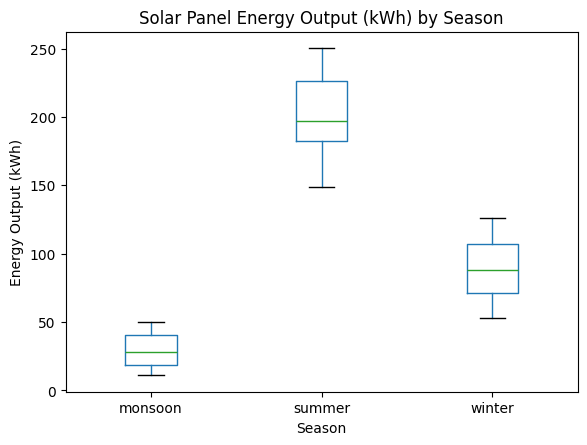

In [10]:
import matplotlib.pyplot as plt

# Boxplot of kWh by season
plt.figure(figsize=(8,6))
df_all_seasons.boxplot(column='kwh', by='season', grid=False)
plt.title('Solar Panel Energy Output (kWh) by Season')
plt.suptitle('')  # Remove automatic subtitle
plt.xlabel('Season')
plt.ylabel('Energy Output (kWh)')
plt.show()

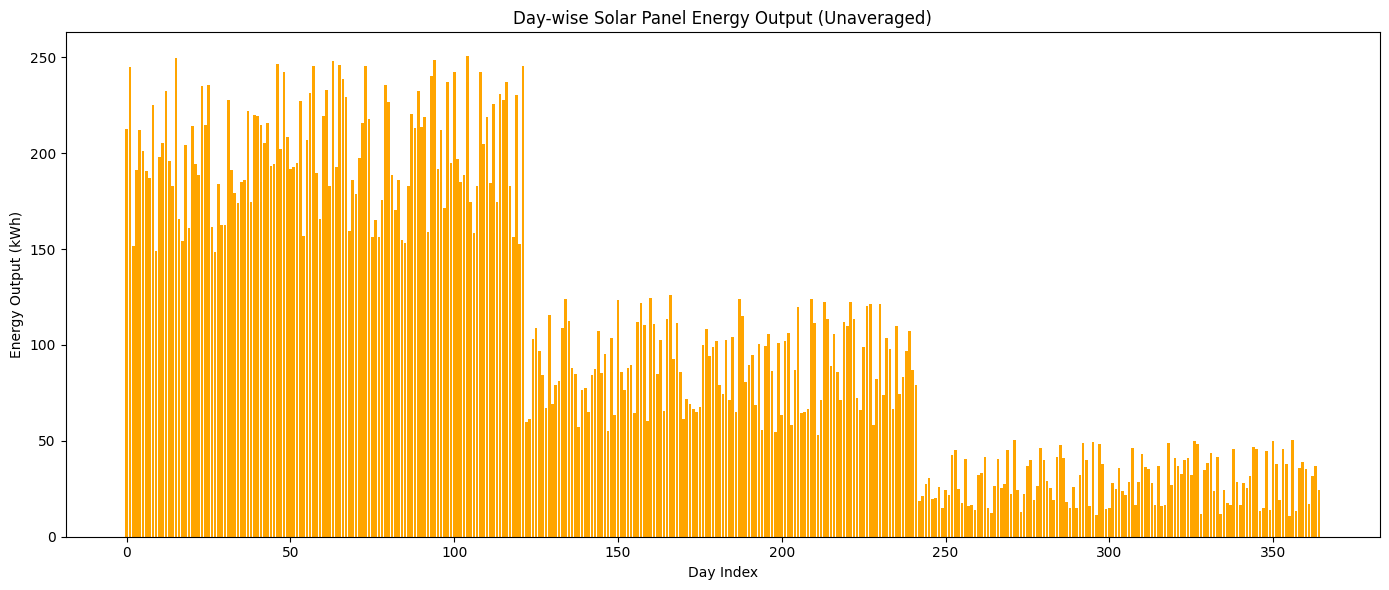

In [11]:
import matplotlib.pyplot as plt

# Plotting kWh for each row (day) using index as x-axis
plt.figure(figsize=(14,6))
plt.bar(df_all_seasons.index, df_all_seasons['kwh'], color='orange')

plt.xlabel('Day Index')
plt.ylabel('Energy Output (kWh)')
plt.title('Day-wise Solar Panel Energy Output (Unaveraged)')
plt.tight_layout()
plt.show()

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Load your CSV file
df = pd.read_csv("/content/solar_performance_all_seasons.csv")  # Replace with your actual filename

# Step 2: Define features (X) and target (y)
X = df[['irradiance', 'humidity', 'wind_speed', 'ambient_temperature', 'tilt_angle']]
y = df['kwh']

# Step 3: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(292, 5)
(73, 5)
(292,)
(73,)


In [14]:
# Step 4: Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = model.predict(X_test)

# Step 6: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Step 7: Print model details and evaluation
print("Model Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

Model Coefficients: [ 0.25561646 -0.23487398 -1.64462389  1.12504583 -0.74081501]
Intercept: -15.931733071129813
Mean Squared Error (MSE): 229.31860833775843
R² Score: 0.9669126543898163


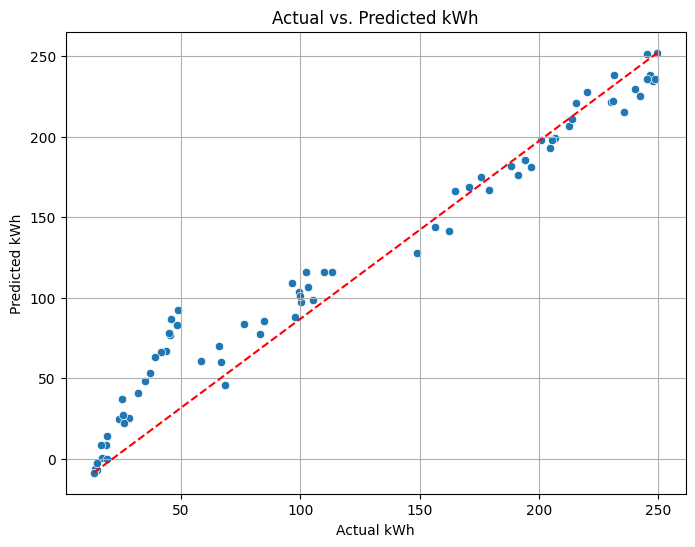

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Scatter plot: Actual vs. Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual kWh")
plt.ylabel("Predicted kWh")
plt.title("Actual vs. Predicted kWh")
plt.plot([y_test.min(), y_test.max()], [y_pred.min(), y_pred.max()], 'r--')  # Diagonal line red dash line
plt.grid(True)
plt.show()

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import   classification_report, accuracy_score

# Step 1: Load the CSV (replace with your real filename)
df = pd.read_csv("/content/solar_performance_all_seasons.csv")  # Update with actual path

# Step 2: Define features (X) and target (y)
X = df[['irradiance', 'humidity', 'wind_speed', 'ambient_temperature', 'tilt_angle','kwh']]
y = df['season']

# Step 3: Encode the categorical target into numeric labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)  # e.g., summer -> 2, winter -> 1, etc.

# Step 4: Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [17]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(292, 6)
(73, 6)
(292,)
(73,)


In [18]:
# Step 5: Train Logistic Regression model
model = LogisticRegression(max_iter=10)
model.fit(X_train, y_train)

# Step 6: Make predictions
y_pred = model.predict(X_test)

# Step 7: Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

Accuracy: 0.9726027397260274

Classification Report:
               precision    recall  f1-score   support

     monsoon       0.96      0.96      0.96        25
      summer       1.00      1.00      1.00        31
      winter       0.94      0.94      0.94        17

    accuracy                           0.97        73
   macro avg       0.97      0.97      0.97        73
weighted avg       0.97      0.97      0.97        73



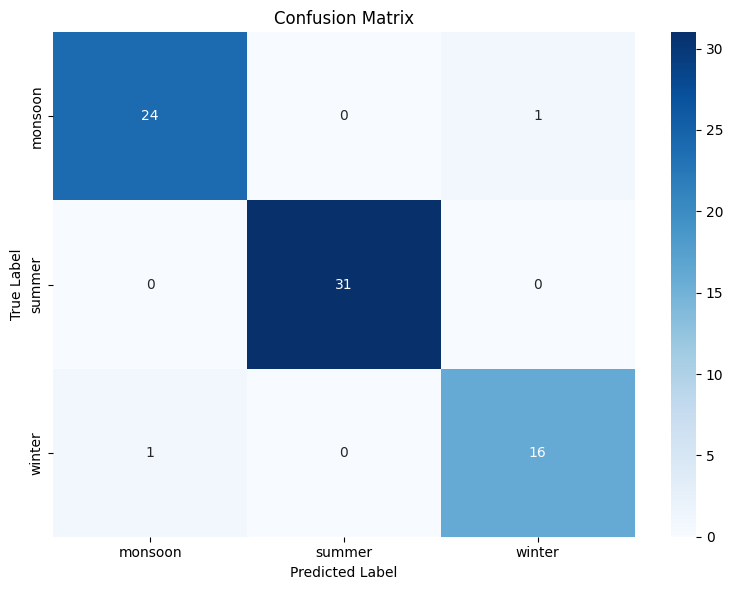

In [19]:
from sklearn.metrics import confusion_matrix
# Step 8: Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()